<h2>Task-6: Time Series Analysis (Sales Forecasting) </h2>

<h4>Step 1: Import Libraries & Load Dataset</h4>

In [14]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SiriVyshu\OneDrive\Desktop\Manu\sales_dataset.csv",
                 parse_dates=["Date"], index_col="Date")

df.head()

,Sales
Date,
2022-01-01,205
2022-01-02,199
2022-01-03,207
2022-01-04,216
2022-01-05,199


<h4>Step 2: Visualize Sales Trends</h4>

In [16]:
import matplotlib.pyplot as plt

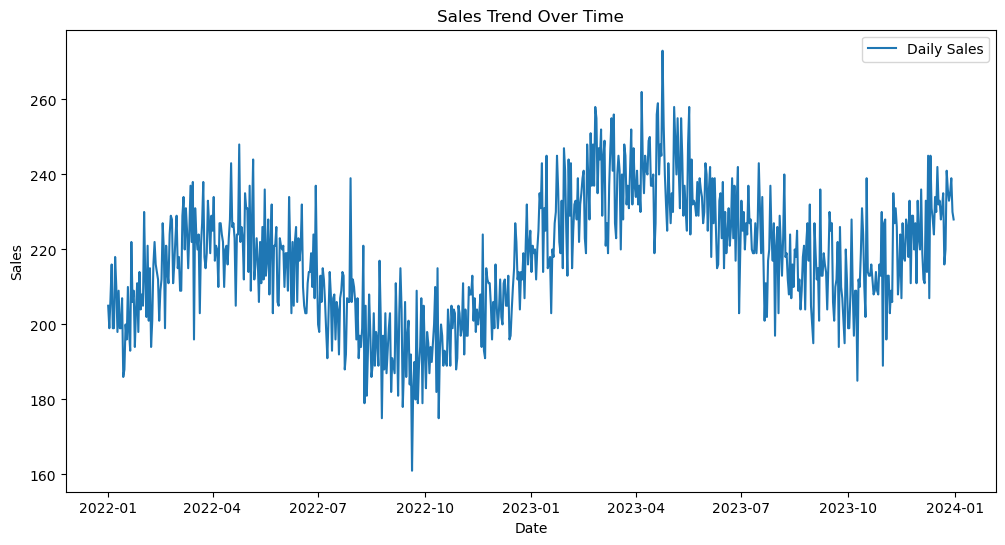

In [17]:
# Line plot of sales
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Sales"], label="Daily Sales")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

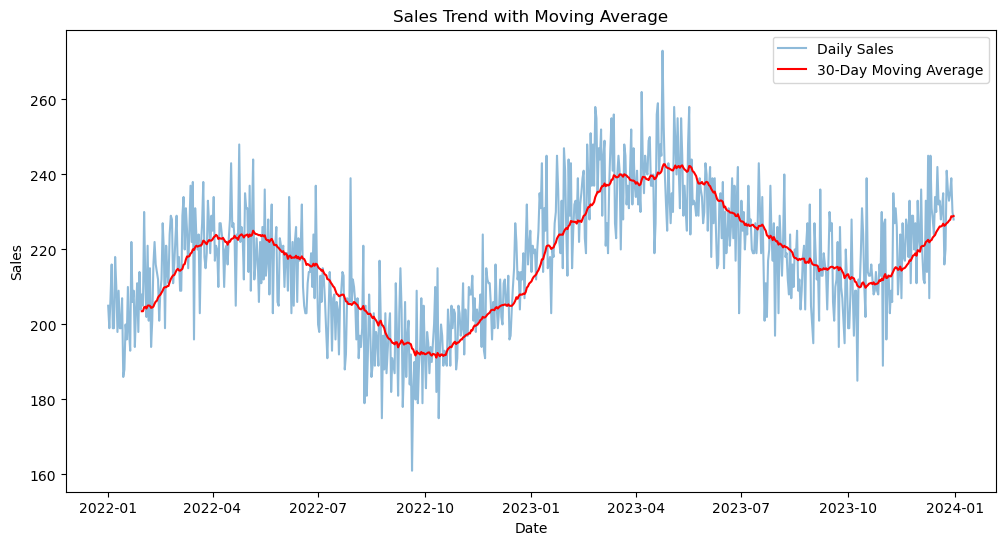

In [18]:
# Moving Average (30 days)
df["Sales_MA30"] = df["Sales"].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Sales"], alpha=0.5, label="Daily Sales")
plt.plot(df.index, df["Sales_MA30"], color="red", label="30-Day Moving Average")
plt.title("Sales Trend with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

<h4>Step 3: Train-Test Split & ARIMA Model</h4>

In [19]:
from statsmodels.tsa.arima.model import ARIMA

# Step 3: Train-Test Split (80-20)
train_size = int(len(df) * 0.8)
train, test = df["Sales"][:train_size], df["Sales"][train_size:]

print("Train data length:", len(train))
print("Test data length:", len(test))

# ARIMA Model (p,d,q) = (5,1,0)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast for test period
forecast = model_fit.forecast(steps=len(test))

# Show first 10 forecasted values
print("\nSample Forecasted Values:\n", forecast.head(10))

Train data length: 584
Test data length: 146

Sample Forecasted Values:
 2023-08-08    221.121578
2023-08-09    225.623763
2023-08-10    224.154810
2023-08-11    222.574842
2023-08-12    226.792962
2023-08-13    226.929063
2023-08-14    224.471554
2023-08-15    225.371482
2023-08-16    224.850633
2023-08-17    224.950940
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\SiriVyshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SiriVyshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SiriVyshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<h4>Step 4: Model Evaluation</h4>

RMSE: 14.078562127952155


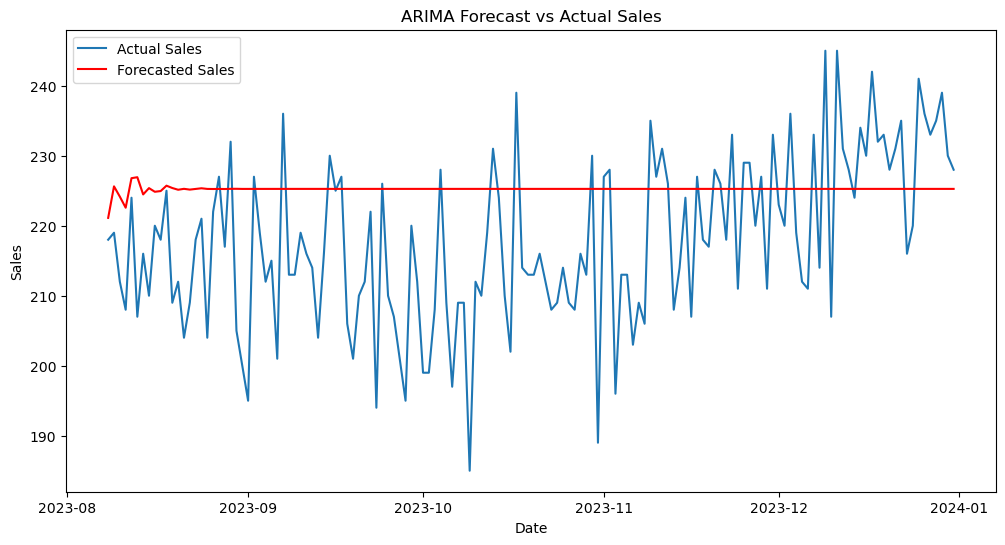

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# RMSE calculation
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

# Plot actual vs forecast
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual Sales")
plt.plot(test.index, forecast, color="red", label="Forecasted Sales")
plt.title("ARIMA Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

<h4>Step 5: Future Forecast (Next 90 Days)</h4>

In [23]:
# Train on full dataset
model_full = ARIMA(df["Sales"], order=(5,1,0))
model_full_fit = model_full.fit()

# Forecast next 90 days
future_forecast = model_full_fit.forecast(steps=90)

# Save forecast
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=90)
forecast_df = pd.DataFrame({"Date": future_dates, "Forecasted_Sales": future_forecast})

forecast_df.to_csv("future_sales_forecast.csv", index=False)
print("Future forecast saved as future_sales_forecast.csv")
forecast_df.head()

Future forecast saved as future_sales_forecast.csv


C:\Users\SiriVyshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SiriVyshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\SiriVyshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,Date,Forecasted_Sales
2024-01-01,2024-01-01,233.506382
2024-01-02,2024-01-02,232.574242
2024-01-03,2024-01-03,233.376301
2024-01-04,2024-01-04,233.065769
2024-01-05,2024-01-05,231.497173


<h2>Predicting Heart Disease Using Logistic Regression</h2>

<h4>Step 1: Load the Dataset & Clean Data</h4>

In [9]:
import pandas as pd

# Load dataset (dummy dataset or your heart_disease.csv file)
df = pd.read_csv("C:/Users/SiriVyshu/OneDrive/Desktop/Manu/heart_disease.csv")

# Check first 5 rows
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Remove duplicates (if any)
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

   Age  Gender  Cholesterol  Blood_Pressure  Heart_Disease
0   68    Male          188             162              0
1   58    Male          231             134              0
2   44    Male          249             145              0
3   72  Female          151             173              1
4   37    Male          226             171              0

Missing Values:
 Age               0
Gender            0
Cholesterol       0
Blood_Pressure    0
Heart_Disease     0
dtype: int64

Shape after removing duplicates: (1000, 5)


  <h4>Step 2: Feature Engineering (Encoding + Scaling)</h4>

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode Gender (Male=1, Female=0)
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Features (X) and Target (y)
X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

# Normalize / Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X_scaled:", X_scaled.shape)

Shape of X_scaled: (1000, 4)


<h4>Step 3: Train Logistic Regression Model</h4>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

<h4>Step 4: Model Evaluation</h4>

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report (Accuracy, Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[103  15]
 [ 74   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.87      0.70       118
           1       0.35      0.10      0.15        82

    accuracy                           0.56       200
   macro avg       0.46      0.49      0.43       200
weighted avg       0.49      0.56      0.47       200

